# Text analytics

In this module, we will learn the basics of text analytics in Python. Text analytics means processing and analyzing large amounts of unstructured text data. Unstructured text data refers to data that is not organized in tables or other predefined structures. Examples of unstructured text data include emails, social media posts, and customer reviews.

We will explore the possibilities of text analytics through three tasks: word clouds, sentiment analysis, and word embeddings. These tasks are common in text analytics and provide insights into the content and sentiment of text data. We will use Python libraries such as WordCloud, NLTK, Gensim, and others to perform these tasks.

## Task 1: Word cloud

Some text analytics tasks can be performed with just a few lines of code. Word clouds, for example, are a popular way to visualize the most common words in a text. 

In the following example, we construct a word cloud from the text of the book "The Hound of the Baskervilles" by Arthur Conan Doyle. The text is downloadable from the Project Gutenberg website.


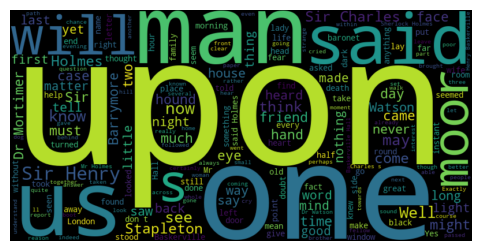

In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

with open("./datasets/novels/the_hound_of_the_baskervilles.txt", "r", encoding="utf-8") as file:
    text = file.read()

wordcloud = WordCloud(width=800, height=400).generate(text)

plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The initial word cloud is not very informative because it includes common words such as "the", "and", and "to". these common words are called stopwords. We can remove stopwords from the text before creating the word cloud. The removal of the stopwords is based on a list of common stopwords:

In [63]:
from wordcloud import STOPWORDS
print(STOPWORDS)

{"hasn't", "we'll", 'they', 'that', 'else', 'yourself', 'if', "you'd", "what's", 'me', "how's", 'any', "that's", 'but', 'does', 'i', 'were', 'www', "we're", 'below', 'otherwise', 'in', "they're", 'would', 'r', "i'm", "hadn't", 'she', 'been', "you've", "they'd", 'when', "she'll", "why's", 'other', 'while', 'how', 'out', 'why', "there's", 'himself', "aren't", 'until', "isn't", 'not', 'this', "haven't", 'you', 'few', 'is', 'them', 'am', 'are', 'as', 'ours', 'more', 'therefore', 'k', 'or', 'has', 'hence', 'than', 'however', 'under', 'no', 'off', "let's", 'too', 'having', 'theirs', 'up', 'hers', 'by', 'like', 'before', 'had', 'did', 'so', 'itself', 'also', "they'll", 'a', 'his', 'during', 'into', 'then', "couldn't", 'can', 'yourselves', "you're", 'most', 'be', 'http', 'the', 'down', "shan't", 'our', 'of', 'such', 'those', "weren't", 'have', 'could', 'yours', 'above', 'from', 'he', 'your', 'whom', 'which', 'further', 'own', 'for', 'where', 'over', "here's", 'some', 'get', 'about', 'at', 'onl

This list is built in the wordcloud library, so we just add the corresponding parameter to the WordCloud constructor in the previous example. It is also possible to add custom stopwords, so we will add a few that attracted our eye in the initial word cloud. Let's see how the word cloud changes when we remove the stopwords.

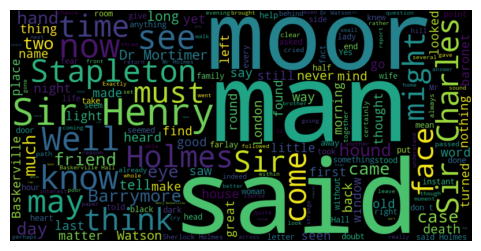

In [64]:


with open("./datasets/novels/the_hound_of_the_baskervilles.txt", "r", encoding="utf-8") as file:
    text = file.read()

my_stopwords = set(STOPWORDS)
my_stopwords.update(["upon", "one", "will", "us", "s"])

wordcloud = WordCloud(width=800, height=400, stopwords=my_stopwords).generate(text)

plt.figure(figsize=(6, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


The resulting word cloud is able to grasp the essential vocabulary of the novel in a much better way than the first one.

As we constructed our word cloud, we executed several steps that belong to the basic workflow of text analytics:

1. Tokenize the text data into words.
2. Remove stopwords.
3. Stem or lemmatize the words. (we did not do this in the example)

Let's look at these steps in more detail.

### Step 1: Tokenization

Tokenization refers to splitting text into words or smaller sub-texts. The most common tokenization method is to split the text into words using spaces. During tokenization, punctuation can also be removed, and the text can be converted to lowercase. The WordCloud library performs simple tokenization by default, splitting the text into words and removing some punctuation.

In some cases, a simple "one token per word" approach may not be optimal. For example, subword tokenization can split a single word into multiple tokens, particularly when dealing with different forms or parts of words. An online demo showcasing a variety of tokenization methods can be found at https://tiktokenizer.vercel.app/. In this demo, you can see how certain methods generate multiple tokens from a single word. The demo also shows how words are replaced by index values that point to an existing vocabulary, which is useful when working with machine learning models.

### Step 2: Stopword removal

Stopwords are common words that are often removed from text data before analysis. These words do not carry much information about the content of the text and can be found in almost any document. Examples of stopwords include "the", "and", "to", "of", and "a". Removing stopwords can help focus on the more important words in the text, as the stopwords have the tendency of diluting the signal sought in the text. In the previous example, we used the WordCloud library's built-in list of stopwords and added a few custom stopwords. Some libraries, such as NLTK, also provide lists of stopwords in multiple languages.

### Step 3: Stemming and lemmatization

Stemming refers to combining words with similar meanings into a single root word. For example, the words "interesting", "interests", and "interested" can all be stemmed to "interest". Stemming can help reduce the number of unique words in the text data, which can be useful for tasks like text classification. However, stemming can also produce non-words or words that are not easily interpretable.
 
There are different stemming algorithms available, such as the Porter Stemmer and the Snowball Stemmer. The NLTK library, which is a commonly used library for natural language processing, provides implementations of these stemming algorithms.

Let's see an example of stemming using the Porter Stemmer from the NLTK library. We let the stemmer process a short tokenized text and display the output for each word.




In [65]:
# Import the NLTK library and download the Porter Stemmer
import nltk

# uncomment the following lines if you have not downloaded the NLTK resources
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Create a Porter Stemmer object
stemmer = PorterStemmer()

# Define a sample text
text = "Avoiding the common mistakes in text analytics is essential for successful analysis."

# Remove punctuation
text = text.replace(".", "").replace(",", "")

# Tokenize the text into words
words = word_tokenize(text)

# Apply stemming to each word
stemmed_words = [stemmer.stem(word) for word in words]

print(words)
print(stemmed_words)
    

['Avoiding', 'the', 'common', 'mistakes', 'in', 'text', 'analytics', 'is', 'essential', 'for', 'successful', 'analysis']
['avoid', 'the', 'common', 'mistak', 'in', 'text', 'analyt', 'is', 'essenti', 'for', 'success', 'analysi']


As you see, the Porter Stemmer reduces words to a stripped-down format that may or may not be a valid word. In the example, "avoiding" is stemmed to "avoid", "mistakes" is stemmed to "mistak", and "analytics" is stemmed to "analyt". The stemming process can sometimes produce non-words, as in the case of "mistak". This is a trade-off between reducing the number of unique words and maintaining the interpretability of the text. Even though the stemmed words may not be valid words, they can still be useful for certain text analytics tasks.

Another option for reducing words to a common form is lemmatization. Lemmatization is similar to stemming, but it produces valid words by considering the context of the word. For example, the words "is", "are", and "am" would all be lemmatized to "be". The NLTK library provides a WordNet Lemmatizer that can be used for lemmatization. Let's see an example of lemmatization using the WordNet Lemmatizer:

In [66]:
from nltk.stem import WordNetLemmatizer

# Create a WordNet Lemmatizer object
lemmatizer = WordNetLemmatizer()

# Define a sample text
text = "Avoiding the common mistakes in text analytics is essential for successful analysis."

# Remove punctuation
text = text.replace(".", "").replace(",", "")

# Tokenize the text into words
words = word_tokenize(text)

# Apply lemmatization to each word
lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

print(words)
print(lemmatized_words)


['Avoiding', 'the', 'common', 'mistakes', 'in', 'text', 'analytics', 'is', 'essential', 'for', 'successful', 'analysis']
['Avoiding', 'the', 'common', 'mistake', 'in', 'text', 'analytics', 'is', 'essential', 'for', 'successful', 'analysis']


Lemmatization can be further optimized by specifying the part of speech (POS) tag of the word. The POS tag indicates the role of the word in the sentence (e.g., noun, verb, adjective). By providing the POS tag, the lemmatizer can choose the correct lemma based on the context of the word.

### POS tagging

In the previous example, we tried lemmatization. To further improve the lemmatization process, we can use POS tagging. POS tagging assigns a POS tag to each word in the text, indicating the word's role in the sentence. For example, the word "running" can be a verb or a noun, and POS tagging can help determine the correct lemma based on the context.

The NLTK library provides a POS tagger that can be used to tag words with their corresponding POS tags. POS tagging also has other use cases, such as named entity recognition and syntactic parsing. Let's see an example of POS tagging using the NLTK POS tagger:

In [67]:
# Example of POS tagging using NLTK

import nltk
from nltk import pos_tag
from nltk.tokenize import word_tokenize

# Define a sample text
text = "Avoiding the common mistakes in text analytics is essential for successful analysis."

# Tokenize the text into words
words = word_tokenize(text)

# Perform POS tagging
pos_tags = pos_tag(words)

print(pos_tags)


[('Avoiding', 'VBG'), ('the', 'DT'), ('common', 'JJ'), ('mistakes', 'NNS'), ('in', 'IN'), ('text', 'JJ'), ('analytics', 'NNS'), ('is', 'VBZ'), ('essential', 'JJ'), ('for', 'IN'), ('successful', 'JJ'), ('analysis', 'NN'), ('.', '.')]


The codes attached to each work are POS tags who show the role of the word in the sentence. For example, "Avoiding" is tagged as a verb (VBG), "the" is tagged as a determiner (DT), and "common" is tagged as an adjective (JJ). A complete lookup table of POS tags can be found at https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html.

## Task 2: Sentiment analysis

As another example of text analytics, we will perform sentiment analysis on novel texts. Sentiment analysis is the process of determining the sentiment or opinion expressed in a piece of text. The sentiment can be positive, negative, or neutral. Sentiment analysis is widely used in social media monitoring, customer feedback analysis, and market research.

The basic approach for sentiment analysis is just to look at the text word by word and see if the words are positive or negative. This is a simple approach that can be effective for many cases. We will use this approach in the following example where we will scan the contents of a novel and calculate the numbers of positive vs. negative words in a sliding window of 500 words.
 
We will use the AFINN lexicon, which is a list of English words rated for valence with an integer between -5 (negative) and +5 (positive). The AFINN lexicon is available in the author's GitHub repository at https://github.com/fnielsen/afinn.


In [68]:
# Load the hound of the baskervilles text

import requests

with open("./datasets/novels/the_hound_of_the_baskervilles.txt", "r", encoding="utf-8") as file:
    text = file.read()
    
# Load the AFINN lexicon from the internet
url = "https://raw.githubusercontent.com/fnielsen/afinn/master/afinn/data/AFINN-en-165.txt"
response = requests.get(url)
afinn = dict()

for line in response.text.splitlines():
    word, score = line.split("\t")
    afinn[word] = int(score)

# Check the first few entries in AFINN
print(list(afinn.items())[:5])

[('abandon', -2), ('abandoned', -2), ('abandons', -2), ('abducted', -2), ('abduction', -2)]


Next, let's read The Hound of the Baskervilles text and calculate the sentiment score using a window of 2000 words. We will calculate four metrics for each window: the number of positive words, the number of negative words, the difference between the number of positive and negative words, and the sum of positive and negative words. We will then plot these metrics to see how the sentiment changes throughout the text.

In each step, the window will slide by 10 words.


In [69]:
# Perform sentiment analysis on the novel text

import numpy as np

# Tokenize the text into words
words = text.split()

# Define the window size
window_size = 2000
slide_step = 10

# Initialize lists to store the sentiment scores
positive_scores = []
negative_scores = []
difference_scores = []
sum_scores = []

# Calculate the sentiment scores for each window
for i in range(0, len(words)-window_size , slide_step):
    window = words[i:i + window_size]
    positive_score = sum(afinn.get(word, 0) > 0 for word in window)
    negative_score = sum(afinn.get(word, 0) < 0 for word in window)
    positive_scores.append(positive_score)
    negative_scores.append(negative_score)
    difference_scores.append(positive_score - negative_score)
    sum_scores.append(positive_score + negative_score)
    


Finally, let's print the sentiment scores and plot them to see how the sentiment changes throughout the text. We will plot all the four metrics, together with a sample of text for the window with the highest score.

> Note that the index refers to the starting location of the window.

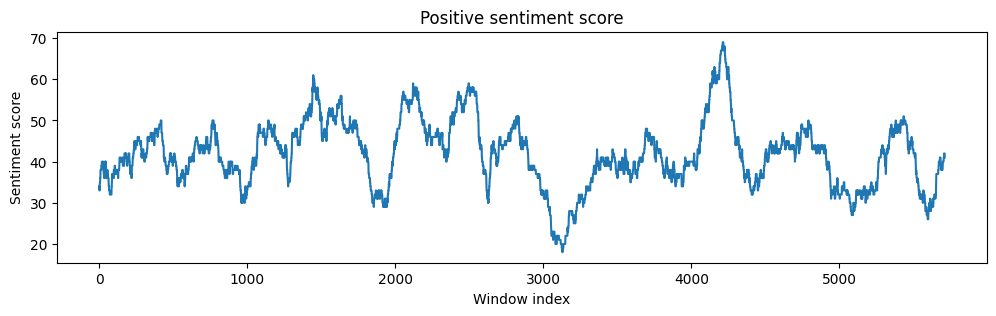

who had been brought into contact with him. In these days of _nouveaux riches_ it is refreshing to find a case where the scion of an old county family which has FALLEN upon EVIL days is able to make his own FORTUNE and to bring it back with him to RESTORE the FALLEN grandeur of his line. Sir Charles, as is well known, made large sums of money in South African speculation. More wise than those who go on until the wheel turns against them, he realised his GAINS and returned to England with them. It is only two years since he took up his residence at Baskerville Hall, and it is common talk how large were those schemes of reconstruction and IMPROVEMENT which have been INTERRUPTED by his death. Being himself childless, it was his openly expressed DESIRE that the whole countryside should, within his own lifetime, PROFIT by his GOOD fortune, and many will have personal reasons for bewailing his untimely end. His GENEROUS donations to local and county charities have been frequently chronicled 

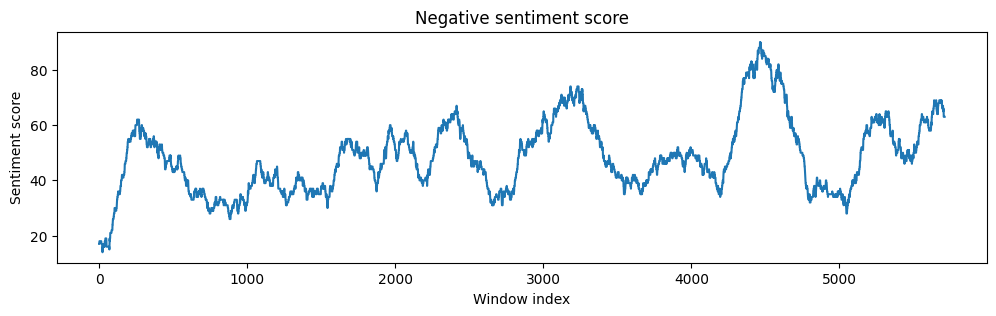

to have been in some ways of an eccentric habit of mind. In spite of his considerable WEALTH he was simple in his personal tastes, and his indoor servants at Baskerville Hall consisted of a married couple named Barrymore, the husband acting as butler and the wife as housekeeper. Their evidence, corroborated by that of several friends, tends to show that Sir Charles’s health has for some time been impaired, and points especially to some AFFECTION of the heart, manifesting itself in changes of colour, breathlessness, and acute ATTACKS of NERVOUS depression. Dr. James Mortimer, the FRIEND and medical attendant of the deceased, has given evidence to the same effect. “The facts of the case are simple. Sir Charles Baskerville was in the habit every night before going to bed of walking down the FAMOUS yew alley of Baskerville Hall. The evidence of the Barrymores shows that this had been his custom. On the fourth of May Sir Charles had declared his intention of starting next day for London, an

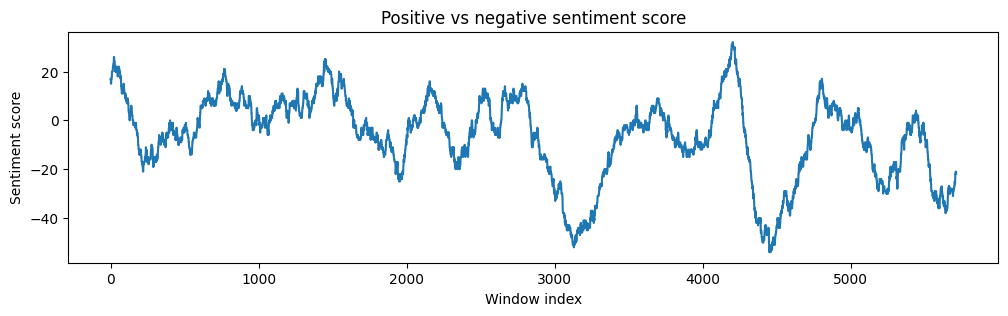

and extreme generosity had WON the AFFECTION and RESPECT of all who had been brought into contact with him. In these days of _nouveaux riches_ it is refreshing to find a case where the scion of an old county family which has FALLEN upon EVIL days is able to make his own FORTUNE and to bring it back with him to RESTORE the FALLEN grandeur of his line. Sir Charles, as is well known, made large sums of money in South African speculation. More wise than those who go on until the wheel turns against them, he realised his GAINS and returned to England with them. It is only two years since he took up his residence at Baskerville Hall, and it is common talk how large were those schemes of reconstruction and IMPROVEMENT which have been INTERRUPTED by his death. Being himself childless, it was his openly expressed DESIRE that the whole countryside should, within his own lifetime, PROFIT by his GOOD fortune, and many will have personal reasons for bewailing his untimely end. His GENEROUS donation

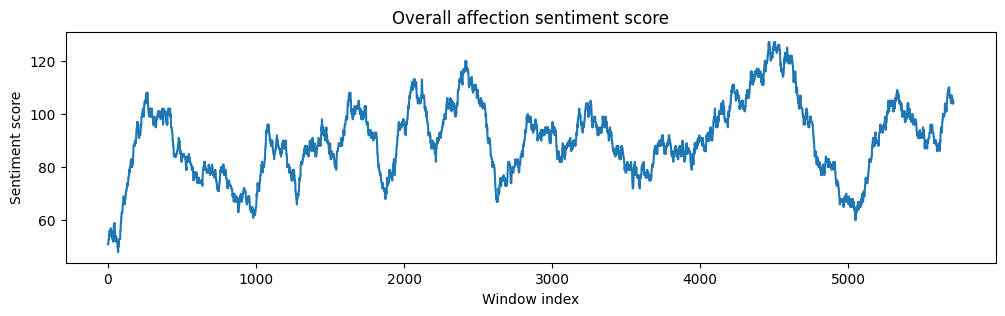

to have been in some ways of an eccentric habit of mind. In spite of his considerable WEALTH he was simple in his personal tastes, and his indoor servants at Baskerville Hall consisted of a married couple named Barrymore, the husband acting as butler and the wife as housekeeper. Their evidence, corroborated by that of several friends, tends to show that Sir Charles’s health has for some time been impaired, and points especially to some AFFECTION of the heart, manifesting itself in changes of colour, breathlessness, and acute ATTACKS of NERVOUS depression. Dr. James Mortimer, the FRIEND and medical attendant of the deceased, has given evidence to the same effect. “The facts of the case are simple. Sir Charles Baskerville was in the habit every night before going to bed of walking down the FAMOUS yew alley of Baskerville Hall. The evidence of the Barrymores shows that this had been his custom. On the fourth of May Sir Charles had declared his intention of starting next day for London, an

In [70]:
# Plot each sentiment score as the function of the window index
# Make each plot in a different image

import matplotlib.pyplot as plt

for scores, title in zip([positive_scores, negative_scores, difference_scores, sum_scores],
                            ["Positive", "Negative", "Positive vs negative", "Overall affection"]):
        plt.figure(figsize=(12, 3))
        plt.plot(scores)
        plt.title(f"{title} sentiment score")
        plt.xlabel("Window index")
        plt.ylabel("Sentiment score")
        plt.show()
        
        # print sample of text for the window with the highest score with tagged words capitalized
        max_score_index = np.argmax(scores)
        window = words[max_score_index:max_score_index + window_size]
        tagged_window = [word.upper() if word in afinn else word for word in window]
        print(" ".join(tagged_window))
        

In the previous example, we used sentiment analysis to deminstrate how the sentiment changes as the novel proceeds. In business applications, sentiment analysis can be used to analyze customer reviews, social media posts, and other text data to understand customer opinions and trends. Sentiment analysis can also be used to monitor brand reputation, identify emerging issues, and track customer satisfaction. For example, one can monitor the sentiment of social media posts about a product launch to gauge customer reactions and identify areas for improvement if the metrics show a negative trend. For this purpose, commercial sentiment analysis tools are available that can analyze large volumes of text data and provide insights into customer sentiment in an illustrative, visual dashboard.

## Task 3: Word embeddings

As the third task, we will explore word embeddings. Word embeddings are dense vector representations of words in a continuous vector space. These representations capture the semantic meaning of words and their relationships with other words.

This approach is utilized in Google's Word2Vec, which is a popular word embedding technique. It provides two alternative methods: Continuous Bag of Words (CBOW) and Skip-gram. In this example, we will focus on the CBOW method.

Word2Vec is trained on a large corpus of text data and represents each word with a vector in a multidimensional space. Words with similar meanings are represented by vectors that are close to each other in this space. The number of dimensions in the vector space is typically much smaller than the number of different words in the vocabulary, and it is a hyperparameter chosen by the modeler.

While scanning the input text, Word2Vec applies a sliding window that considers a few words before and after the target word.

For simplicity, let's assume that our input text (corpus) is the following, after the removal of punctuation and stop words:

```
cat eats fish dog eats meat cat and dog are friends
```

There are eight different words in the corpus: "cat", "eats", "fish", "dog", "meat", "and", "are", "friends." This means that each word appearing in the text will eventually be encoded by a vector, but the dimension of this vector (e.g., 8-dimensional) is a hyperparameter and not directly determined by the number of unique words in the corpus.

In CBOW, when scanning the input text, Word2Vec takes the context words surrounding the target word to predict that target word. For example, if the target word is "are" and we use a sliding window size of 1 word backward and 1 word forward, the context words would be "dog" and "friends."

As the algorithm starts, each word is initially represented by a vector of random values. For example, the first word "cat" might be represented by the vector [0.13, 0.20, 0.12, 0.74, 0.25, 0.36, 0.42, 0.89].

During training, these vectors are fed into a neural network, which processes the inputs and produces a vector of probabilities for the target word being each word in the vocabulary. Based on whether the prediction is correct or not, the values in the vectors are adjusted to minimize the prediction error.

> On this course, we will not go into the details of the neural network architecture used in Word2Vec. Neural Networks will be covered on a separate course.

The final vectors, after training, represent the word embeddings and capture the semantic relationships between words. The idea is that if we have two words with a similar role and/or meaning, such as "lemonade" and "soda", their vectors will be close to each other in the vector space. As a consequence, the angle between the vectors representing these words will be small, and the cosine between them will be close to 1. The value of the cosine between the vectors is called the cosine similarity, and a value close to 1 indicates that the words are similar.

Let's build a tiny example using the Gensim library that trains a Word2Vec model on a small corpus of text. We will then use the trained model to find similar words to a given word and calculate the similarity between two words.


In [71]:
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize, word_tokenize

sample = open("./datasets/novels/the_hound_of_the_baskervilles.txt", encoding="utf-8")
s = sample.read()
f = s.replace("\n", " ")

data = []
# iterate through each sentence in the file
for i in sent_tokenize(f):
	temp = []
	# tokenize the sentence into words
	for j in word_tokenize(i):
		temp.append(j.lower())
	data.append(temp)

# get rid of stop words
stop_words = set(STOPWORDS)
for i in range(len(data)):
    data[i] = [word for word in data[i] if word not in stop_words]
    
# Train a Word2Vec model on the corpus
model = Word2Vec(data, min_count=1, vector_size=10, window=10)

words = ("dog", "hound")

print(f"Cosine similarity between '{words[0]}' and '{words[1]}':")
print(model.wv.similarity(words[0], words[1]))

# print vector representation of the words
print(f"Vector representation of '{words[0]}':")
print(model.wv[words[0]])

print(f"Vector representation of '{words[1]}':")
print(model.wv[words[1]])

# Find similar words to a given word
print(f"Words most similar to '{words[0]}':")
print(model.wv.most_similar(words[0]))
print(f"Words most similar to '{words[1]}':")
print(model.wv.most_similar(words[1]))


Cosine similarity between 'dog' and 'hound':
0.99622923
Vector representation of 'dog':
[ 0.38443404 -0.16682896  0.8392558   0.32410398  0.06811582 -0.39556372
  1.0533004   0.47088772 -1.2290101  -0.9136931 ]
Vector representation of 'hound':
[ 0.41800117 -0.31967142  1.4429792   0.4922768   0.03748347 -0.68638223
  1.6940526   0.90648645 -2.2232745  -1.5314827 ]
Words most similar to 'dog':
[('lay', 0.9992115497589111), ('light', 0.9986913204193115), ('might', 0.9985141158103943), ('eyes', 0.9984337091445923), ('still', 0.9983382821083069), ('course', 0.9983206391334534), ('black', 0.9982996582984924), ('nothing', 0.9982311129570007), ('looked', 0.9982084631919861), ('round', 0.9981639981269836)]
Words most similar to 'hound':
[('house', 0.9992517828941345), ('old', 0.9991778135299683), (',', 0.9990934729576111), ('well', 0.9990721344947815), ('lady', 0.9990667104721069), ('right', 0.9990167021751404), ('life', 0.9989303946495056), ('together', 0.9988975524902344), ('know', 0.998808

In this example, the data set is very small, so the results are on the borderline of being meaningful. The idea is to train the Word2Vec model on a large corpus of text data to obtain more accurate word embeddings. In the next subsection, we will use pre-trained word embeddings to demonstrate the performance of word embeddings on a larger data set.






### Example: Using pre-trained word embeddings

The example code reads a vectors file trained with a large collection of posts from a Finnish online forum [Suomi24](https://keskustelu.suomi24.fi/). The model is available via [Kielipankki](https://www.kielipankki.fi/).
The trained model is then used for various purposes such as finding similar words and calculating similarities between words.

> The posts are in Finnish, so the word embeddings will be in Finnish as well. If you are not familiar with Finnish, you can still follow the code and see how word embeddings work in practice.


In [72]:
from gensim.models.keyedvectors import KeyedVectors
import requests
import zipfile
import io

# URL of the embeddings zip file
url = "https://www.kielipankki.fi/download/wordvec/suomi24-wordvec/suomi24-wordvec.zip"

# Download and extract the embeddings
response = requests.get(url)
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall('./exploration/suomi24')

# Load the embeddings
embeddings_path = './exploration/suomi24/suomi24-wordvec/suomi24-wordvec.bin'
kv = KeyedVectors.load_word2vec_format(embeddings_path, binary=True)


# Find words most similar to a given word
print("Most similar to 'engineer':")
print(kv.most_similar('insinööri'))

# Similarity between two words
print("\nSimilarity between 'engineer' and a few other professions:")
for profession in ['lääkäri', 'kokki', 'poliisi', 'sairaanhoitaja']:
    print(f"Similarity between 'engineer' and '{profession}':")
    print(kv.similarity('insinööri', profession))   

# Find relationships between words -- use the equivalence of Berlin and Paris to Germany and France.
print("\nFind capitals of a few countries:")
for country in ['Suomi', 'Ruotsi', 'Venäjä', 'Norja']:
    print(f"Capital of {country}:")
    print(kv.most_similar(positive=[country, 'Berliini', 'Pariisi'], negative=['Saksa', 'Ranska'])[0][0])

Most similar to 'engineer':
[('diplomi-insinööri', 0.7899690270423889), ('teknikko', 0.7342792749404907), ('autonasentaja', 0.729515790939331), ('sähköasentaja', 0.7077959179878235), ('arkkitehti', 0.699946939945221), ('DI', 0.6952257752418518), ('ekonomi', 0.6949030756950378), ('hitsaaja', 0.690860390663147), ('merkantti', 0.6874672174453735), ('hitsari', 0.6791896820068359)]

Similarity between 'engineer' and a few other professions:
Similarity between 'engineer' and 'lääkäri':
0.18079005
Similarity between 'engineer' and 'kokki':
0.4098978
Similarity between 'engineer' and 'poliisi':
0.105406076
Similarity between 'engineer' and 'sairaanhoitaja':
0.52189696

Find capitals of a few countries:
Capital of Suomi:
Helsinki
Capital of Ruotsi:
Tukholma
Capital of Venäjä:
Moskova
Capital of Norja:
Oslo
